In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read data
ts_data = pd.read_csv('./data/1-retail_daily_amount.csv', index_col='Date', parse_dates=True)
log_data = pd.read_csv('./data/2-retail_daily_amount_log.csv', index_col='Date', parse_dates=True)
log_data_r_mean = pd.read_csv('./data/2-retail_daily_amount_log_r_mean.csv', index_col='Date', parse_dates=True)
log_returns = pd.read_csv('./data/2-retail_daily_amount_log_returns.csv', index_col='Date', parse_dates=True)
df_diff = pd.read_csv('./data/2-retail_daily_amount_diff.csv', index_col='Date', parse_dates=True)

# Prophet

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(14,10)
plt.style.use('ggplot')
pd.plotting.register_matplotlib_converters()

import warnings
warnings.filterwarnings('ignore')

In [4]:
#ts_data= original data
#ts_data_r_mean=original data with smothing and moving average
#log_data_r_mean = log data with Moving Average and Smoothing 
#log_returns = log and returns (no trend but has seasonality)
#Df_diff = (no trend and no seasonality)
sales_df = ts_data

In [5]:
sales_df.head()

,Amount
Date,
2009-12-01,55853.97
2009-12-02,63941.43
2009-12-03,79982.77
2009-12-04,41119.44
2009-12-05,9803.05


In [6]:
df = sales_df.reset_index()

In [7]:
# Let's rename the columns as required by fbprophet . 
# Additionally, fbprophet doesn't like the index to be a datetime... 
# it wants to see ds as a non-index column, so we won't set an index differently than the integer index.

df=df.rename(columns={'Date':'ds', 'Amount':'y'})
df.head()

,ds,y
0,2009-12-01,55853.97
1,2009-12-02,63941.43
2,2009-12-03,79982.77
3,2009-12-04,41119.44
4,2009-12-05,9803.05


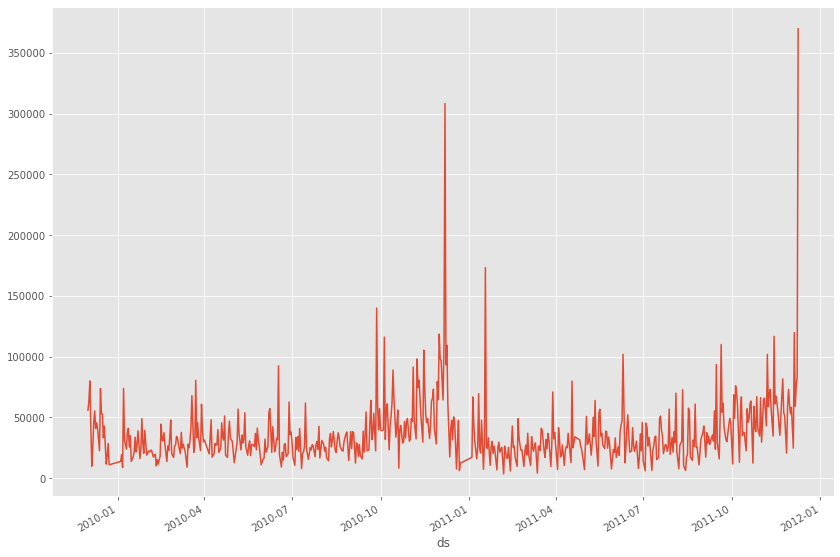

In [8]:
df.set_index('ds').y.plot().get_figure()
plt.show()

In [9]:
# log the y time series
df['y'] = np.log(df['y'])
df.tail()

,ds,y
597,2011-12-05,11.693016
598,2011-12-06,10.988644
599,2011-12-07,11.235881
600,2011-12-08,11.333466
601,2011-12-09,12.820522


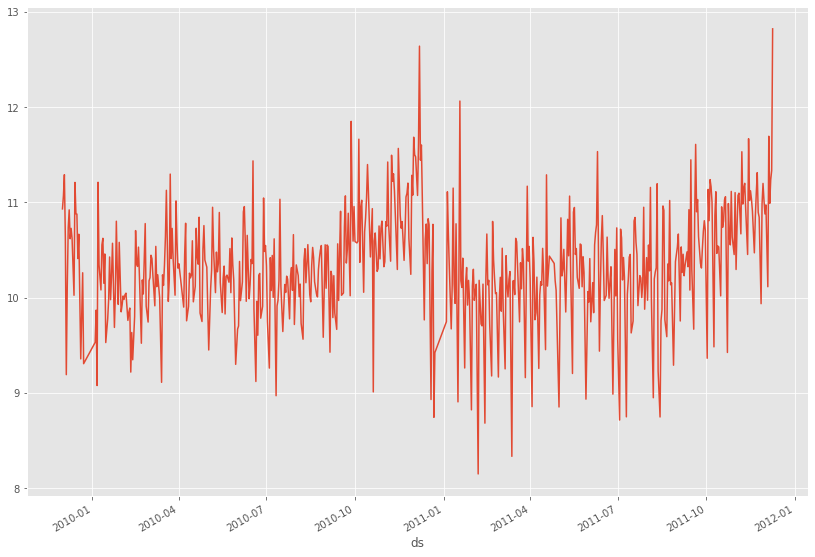

In [10]:
df.set_index('ds').y.plot().get_figure()
plt.show()

In [117]:
# define a new Prophet object and fit to the data
model = Prophet()
model.fit(df);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [118]:
# make future predictions (out-of-sample): 24 time-periods allocation
future = model.make_future_dataframe(periods=300, freq = 'd')
future.tail()

,ds
897,2012-09-30
898,2012-10-01
899,2012-10-02
900,2012-10-03
901,2012-10-04


In [119]:
forecast5 = model.predict(future)

In [120]:
forecast5.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
897,2012-09-30,10.199053,9.789507,10.751112,10.109803,10.272353,0.080480,0.080480,0.080480,-0.389902,-0.389902,-0.389902,0.470382,0.470382,0.470382,0.0,0.0,0.0,10.279533
898,2012-10-01,10.199356,10.579473,11.540047,10.109586,10.272930,0.873683,0.873683,0.873683,0.409445,0.409445,0.409445,0.464238,0.464238,0.464238,0.0,0.0,0.0,11.073039
899,2012-10-02,10.199659,10.619759,11.637189,10.109537,10.273772,0.914306,0.914306,0.914306,0.460050,0.460050,0.460050,0.454256,0.454256,0.454256,0.0,0.0,0.0,11.113965
900,2012-10-03,10.199962,10.389674,11.424349,10.109489,10.274195,0.722488,0.722488,0.722488,0.281609,0.281609,0.281609,0.440879,0.440879,0.440879,0.0,0.0,0.0,10.922450
901,2012-10-04,10.200266,10.654675,11.637013,10.109397,10.274749,0.936369,0.936369,0.936369,0.511736,0.511736,0.511736,0.424634,0.424634,0.424634,0.0,0.0,0.0,11.136635


In [121]:
forecast5[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
897,2012-09-30,10.279533,9.789507,10.751112
898,2012-10-01,11.073039,10.579473,11.540047
899,2012-10-02,11.113965,10.619759,11.637189
900,2012-10-03,10.922450,10.389674,11.424349
901,2012-10-04,11.136635,10.654675,11.637013


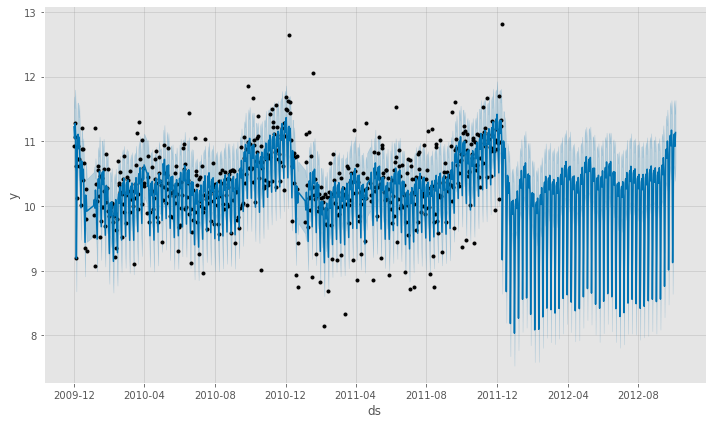

In [122]:
model.plot(forecast5);

In [123]:
df.set_index('ds', inplace=True)
forecast5.set_index('ds', inplace=True)

In [124]:
viz_df = sales_df.join(forecast5[['yhat', 'yhat_lower','yhat_upper']], how ='outer')
viz_df.head()

,Amount,yhat,yhat_lower,yhat_upper
2009-12-01,55853.97,11.224538,10.726536,11.692892
2009-12-02,63941.43,11.048827,10.551955,11.512822
2009-12-03,79982.77,11.275994,10.811165,11.801316
2009-12-04,41119.44,11.027247,10.552829,11.510743
2009-12-05,9803.05,9.193959,8.681684,9.660160


In [125]:
# rescale de y value (since we applied log function, now we go back to original values by applying exp function)
viz_df['yhat_rescaled'] = np.exp(viz_df['yhat'])
viz_df.head()

,Amount,yhat,yhat_lower,yhat_upper,yhat_rescaled
2009-12-01,55853.97,11.224538,10.726536,11.692892,74947.078853
2009-12-02,63941.43,11.048827,10.551955,11.512822,62870.147812
2009-12-03,79982.77,11.275994,10.811165,11.801316,78904.561751
2009-12-04,41119.44,11.027247,10.552829,11.510743,61527.957212
2009-12-05,9803.05,9.193959,8.681684,9.660160,9837.523836


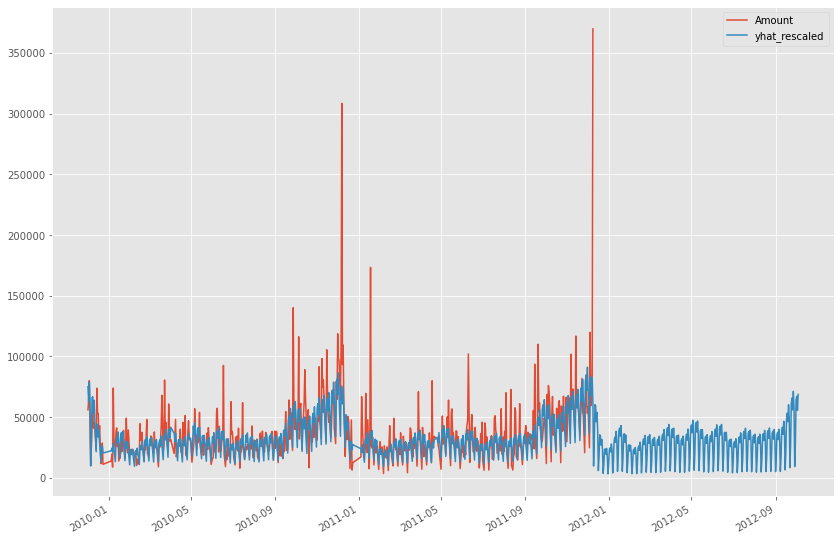

In [126]:
viz_df[['Amount', 'yhat_rescaled']].plot().get_figure()
plt.show()